# K-means paso a paso

## Importamos las librerías que necesitamos

En primer lugar importamos las librerías que vamos a necesitar:
- Numpy (para trabajar con arreglos numéricos -vectores, matrices, tensores...-)
- Matplotlib (para las representaciones gráficas)
- Scikit-learn (para generar el conjunto de datos con el que trabajaremos)

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

## Generamos los datos con los que vamos a trabajar

Scikit-learn me permite fácilmente generar en el espacio de coordenadas (features) que quiera unas distribuciones de puntos agrupadas en el espacio. Para este tutorial trabajaremos con 3 groups en dimensión 2 (n_features).

In [2]:
dataset, membership, centers = datasets.make_blobs(n_samples=500, n_features=2,
                                                   centers=3, return_centers=True,
                                                   cluster_std=1.0)

Representamos nuestros puntos, nuestros datos, para conocerlos y estimar cuál es el resultado que debemos esperar de nuestro algoritmo de K-means.

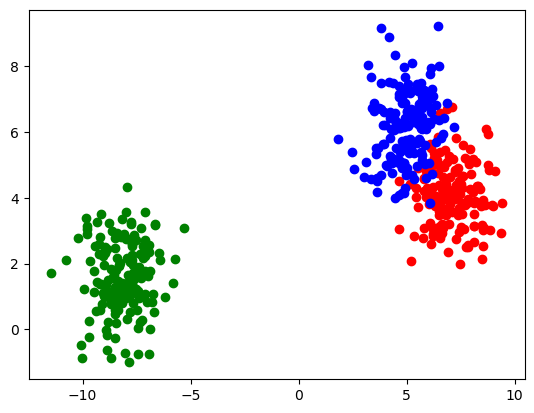

In [3]:
plt.scatter(dataset[(membership==0),0], dataset[(membership==0),1], color='r')
plt.scatter(dataset[(membership==1),0], dataset[(membership==1),1], color='g')
plt.scatter(dataset[(membership==2),0], dataset[(membership==2),1], color='b')
plt.show()

## Construimos y ejecutamos nuestro propio algoritmo paso a paso

Defino el número de centroides:

In [4]:
k=3

Inicializo aleatoriamente las coordenadas de los centroides en la región del espacio 2D ([-10, 10),[-10, 10)).

In [5]:
coors_k = np.random.uniform(low=-10.0, high=10.0, size=[k,2])

Creo un vector de números enteros que almacenará el índice de cluster al que pertenece cada punto:

In [6]:
n_data = dataset.shape[0]

In [7]:
our_membership = np.zeros([n_data], dtype=int)

A continuación defino la variable que monitorizará el desplazamiento más grande de los centroides con el fin de ser empleado como parámetro que interrumpe la iteración del algoritmo.

In [8]:
bigest_movement = np.inf

Defino y ejecuto el bucle del algoritmo.

Recuerda que la implementación debe hacer los siguientes pasos.

In [9]:
iteracion = 1

while (bigest_movement>0.0001): # Interrumpo el bucle si el desplazamiento más largo es menor o igual que 0.0001
    
    # Adjudico puntos al centroide más cercano
    for ii in range(n_data):
        aux_dist = np.inf
        for jj in range(k):
            dist = np.sqrt( (dataset[ii,0]-coors_k[jj,0])**2 +  (dataset[ii,1]-coors_k[jj,1])**2 )
            if dist<aux_dist:
                aux_dist = dist
                our_membership[ii]=jj
    
    # Recalculo centroides
    new_coors_k = np.zeros([k,2], dtype=float)
    for ii in range(k):
        mask = (our_membership == ii)
        new_coors_k[ii,0] = np.mean(dataset[mask, 0])
        new_coors_k[ii,1] = np.mean(dataset[mask, 1])

    # Miro el desplazamiento mayor de los centroides
    
    bigest_movement = 0.0
    
    for ii in range(k):
        
        movement = np.sqrt( (coors_k[ii,0]-new_coors_k[ii, 0])**2 +  (coors_k[ii,1]-new_coors_k[ii,1])**2 )

        if movement>bigest_movement:
            bigest_movement = movement
    
    print(f'Iteración {iteracion} con desplazamiento más largo {bigest_movement}')

    # Actualizo las coordenadas de los centroides
    coors_k = new_coors_k

    # Incremento el índice de iteración en una unidad

    iteracion += 1

Iteración 1 con desplazamiento más largo 5.543624547479384
Iteración 2 con desplazamiento más largo 0.9706542114563985
Iteración 3 con desplazamiento más largo 0.4702314476421579
Iteración 4 con desplazamiento más largo 0.30022425628726757
Iteración 5 con desplazamiento más largo 0.1645267530163892
Iteración 6 con desplazamiento más largo 0.10187570772038652
Iteración 7 con desplazamiento más largo 0.09073282545070609
Iteración 8 con desplazamiento más largo 0.09173361815520271
Iteración 9 con desplazamiento más largo 0.08631895092764555
Iteración 10 con desplazamiento más largo 0.049935412103326464
Iteración 11 con desplazamiento más largo 0.011934274168626082
Iteración 12 con desplazamiento más largo 0.0


## Representamos los clusters definidos por nuestro algoritmo de K-means

Representamos los clusters definidos por nuestro algoritmo de K-means y comprobamos que se parecen a lo que por la construcción de nuestros datos de entrada ya esperábamos.

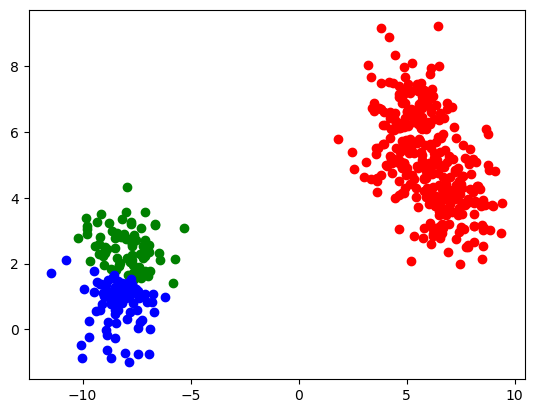

In [10]:
plt.scatter(dataset[(our_membership==0),0], dataset[(our_membership==0),1], color='r')
plt.scatter(dataset[(our_membership==1),0], dataset[(our_membership==1),1], color='g')
plt.scatter(dataset[(our_membership==2),0], dataset[(our_membership==2),1], color='b')
plt.show()